In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check imbalance data
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<AxesSubplot:xlabel='Class'>

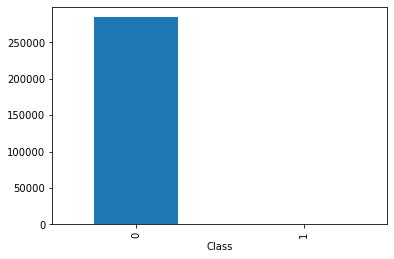

In [5]:
df['Class'].value_counts().plot(kind='bar')

In [6]:
df.shape

(284807, 31)

In [8]:
df = df.sample(n=20000)

df['Class'].value_counts()

Class
0    19975
1       25
Name: count, dtype: int64

# Train model on imbalance dataset

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate accuracy
accuracy = rf_model.score(X_test, y_test)
print("Accuracy:", accuracy)

Confusion Matrix:
[[3992    0]
 [   4    4]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.50      0.67         8

    accuracy                           1.00      4000
   macro avg       1.00      0.75      0.83      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy: 0.999


# Apply Sampling Techniques: (RandomeOverSampler)

In [14]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomOverSampler
ros = RandomOverSampler()

# Perform Random Oversampling
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [16]:
y_ros.value_counts()

Class
0    15983
1    15983
Name: count, dtype: int64

In [15]:

# Initialize the model
rf_model_ros = RandomForestClassifier()

# Train the model on Random Oversampled data
rf_model_ros.fit(X_ros, y_ros)

# Predict on the test set
y_pred_ros = rf_model_ros.predict(X_test)

# Calculate confusion matrix
conf_matrix_ros = confusion_matrix(y_test, y_pred_ros)
print("Confusion Matrix (Random Oversampling):")
print(conf_matrix_ros)

# Calculate classification report
class_report_ros = classification_report(y_test, y_pred_ros)
print("\nClassification Report (Random Oversampling):")
print(class_report_ros)

# Calculate accuracy
accuracy_ros = rf_model_ros.score(X_test, y_test)
print("Accuracy (Random Oversampling):", accuracy_ros)


Confusion Matrix (Random Oversampling):
[[3992    0]
 [   2    6]]

Classification Report (Random Oversampling):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy (Random Oversampling): 0.9995


# Random Undersampling: (RandomeUnderSampler)

In [17]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize RandomUnderSampler
rus = RandomUnderSampler()

# Perform Random Undersampling
X_rus, y_rus = rus.fit_resample(X_train, y_train)


y_rus.value_counts()

Class
0    17
1    17
Name: count, dtype: int64

In [18]:

# Initialize the model
rf_model_rus = RandomForestClassifier()

# Train the model on Random Undersampled data
rf_model_rus.fit(X_rus, y_rus)

# Predict on the test set
y_pred_rus = rf_model_rus.predict(X_test)

# Calculate confusion matrix
conf_matrix_rus = confusion_matrix(y_test, y_pred_rus)
print("Confusion Matrix (Random Undersampling):")
print(conf_matrix_rus)

# Calculate classification report
class_report_rus = classification_report(y_test, y_pred_rus)
print("\nClassification Report (Random Undersampling):")
print(class_report_rus)

# Calculate accuracy
accuracy_rus = rf_model_rus.score(X_test, y_test)
print("Accuracy (Random Undersampling):", accuracy_rus)


Confusion Matrix (Random Undersampling):
[[3970   22]
 [   1    7]]

Classification Report (Random Undersampling):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3992
           1       0.24      0.88      0.38         8

    accuracy                           0.99      4000
   macro avg       0.62      0.93      0.69      4000
weighted avg       1.00      0.99      1.00      4000

Accuracy (Random Undersampling): 0.99425


# SMOTE:

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Initialize SMOTE
smote = SMOTE()

# Perform SMOTE
X_smote, y_smote = smote.fit_resample(X_train, y_train)

y_smote.value_counts()


Class
0    15983
1    15983
Name: count, dtype: int64

In [20]:
# Initialize the model
rf_model_smote = RandomForestClassifier()

# Train the model on SMOTE data
rf_model_smote.fit(X_smote, y_smote)

# Predict on the test set
y_pred_smote = rf_model_smote.predict(X_test)

# Calculate confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix (SMOTE):")
print(conf_matrix_smote)

# Calculate classification report
class_report_smote = classification_report(y_test, y_pred_smote)
print("\nClassification Report (SMOTE):")
print(class_report_smote)

# Calculate accuracy
accuracy_smote = rf_model_smote.score(X_test, y_test)
print("Accuracy (SMOTE):", accuracy_smote)

Confusion Matrix (SMOTE):
[[3992    0]
 [   2    6]]

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3992
           1       1.00      0.75      0.86         8

    accuracy                           1.00      4000
   macro avg       1.00      0.88      0.93      4000
weighted avg       1.00      1.00      1.00      4000

Accuracy (SMOTE): 0.9995


# Prediction

In [24]:
# Get the input data as a 2D array
inputs_1 = X_test.iloc[[10]].values

# Predict with the model
prediction = rf_model_smote.predict(inputs_1)
print("Actual Class :", y_test.iloc[10])
print("Predicted Class:", prediction[0])

Actual Class : 0
Predicted Class: 0


C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [28]:
# Get the input data as a 2D array
inputs_2 = X_test.iloc[[101]].values

# Predict with the model
prediction = rf_model_smote.predict(inputs_1)
print("Actual Class :", y_test.iloc[101])
print("Predicted Class:", prediction[0])

Actual Class : 0
Predicted Class: 0


C:\Users\naimat\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
